## EllipseSearch

##### by Anastasiia Khaburska

In [1]:
import cv2 as cv
import numpy as np
from math import *
from skimage import io

import matplotlib.pyplot as plt

def url_to_image(url):
    print(f'Downloading {url}')
    return cv.cvtColor(io.imread(url), cv.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)


plt.figure(figsize=(15,30))
plt.imshow(cv.cvtColor(imgc, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<Figure size 1500x3000 with 1 Axes>

In [2]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [595,385]], np.double)

M = np.zeros((6,6))

for k in range(0, len(points)):
    M[k][0] = points[k][0] ** 2
    M[k][1] = 2 * points[k][0] * points[k][1]
    M[k][2] = points[k][1] ** 2
    M[k][3] = 2 * points[k][0]
    M[k][4] = 2 * points[k][1]
    M[k][5] = 1
    
print(M)

U, S, V = np.linalg.svd(M)


[[1.33956e+05 2.97924e+05 1.65649e+05 7.32000e+02 8.14000e+02 1.00000e+00]
 [2.63169e+05 3.72438e+05 1.31769e+05 1.02600e+03 7.26000e+02 1.00000e+00]
 [1.42129e+05 3.21204e+05 1.81476e+05 7.54000e+02 8.52000e+02 1.00000e+00]
 [2.36196e+05 4.43232e+05 2.07936e+05 9.72000e+02 9.12000e+02 1.00000e+00]
 [3.19225e+05 5.07370e+05 2.01601e+05 1.13000e+03 8.98000e+02 1.00000e+00]
 [3.54025e+05 4.58150e+05 1.48225e+05 1.19000e+03 7.70000e+02 1.00000e+00]]


In [3]:
R = V[5, :]
R /= R[0]

E = np.array([
    [R[0], R[1], R[3]],
    [R[1], R[2], R[4]],
    [R[3], R[4], R[5]]
], np.double)

print(E)



u, s, v = np.linalg.svd(E)

[[ 1.00000000e+00 -1.67096196e-01 -4.22883658e+02]
 [-1.67096196e-01  7.02911117e+00 -2.79287746e+03]
 [-4.22883658e+02 -2.79287746e+03  1.33436954e+06]]


In [4]:
U2 = np.matmul(u, np.diag(np.sqrt(s)))
H = np.linalg.inv(U2.T)

print(H)

[[-2.74348632e-07  4.51275542e-01  3.82077559e+00]
 [-1.81190778e-06 -5.24478275e-01  3.28748574e+00]
 [ 8.65685204e-04 -9.54734397e-04  8.09167757e-03]]


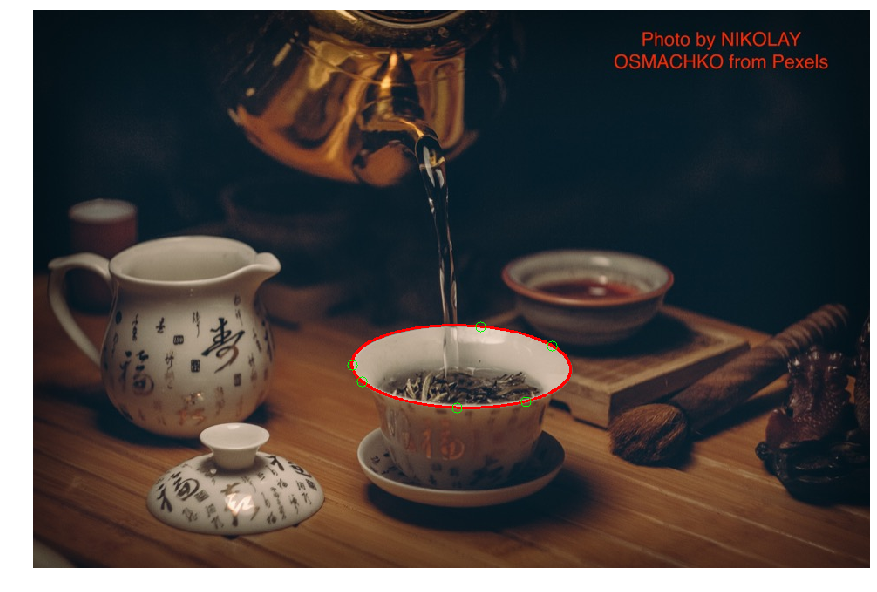

In [5]:
for alpha in range(0, 360):
    
    a1 = np.matmul(H, [
        [sin(pi * alpha / 180)],
        [cos(pi * alpha / 180)],
        [1]
    ])
    
    a1 = (a1 / a1[2])
    
    a2 = np.matmul(H, [
        [sin(pi * (alpha + 1) / 180)],
        [cos(pi * (alpha + 1) / 180)],
        [1]
    ])
    
    a2 = (a2 / a2[2])
    
    cv.line(img, (a1[0], a1[1]), (a2[0], a2[1]), (0, 0, 255), 2)
    
for k in range(0, len(points)):
    cv.circle(img, (int(points[k][0]), int(points[k][1])), 6, (0, 255, 0))

plt.figure(figsize=(15, 30))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()